In [3]:
import pandas
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Data
df = pandas.read_csv("kc_house_data.csv")
dataset = df.values

In [ ]:
# Set les matrices X les features et Y notre target
np.set_printoptions(suppress=True)  # prevent numpy exponential
X_entrer = dataset[:, 1:5]
#X_entrer = StandardScaler().fit_transform(X_entrer)
#X_entrer = np.append(X_entrer, [[4, 3, 1960, 5000]], axis=0)

In [ ]:
# Récupération des valeurs que l'on cherche en décimal (pour l'output)
xPredictionClear = np.split(X_entrer, [len(X_entrer) - 1])[1]

Y_entrer = dataset[:, 0]
#Y_entrer = Y_entrer.reshape(len(Y_entrer), 1)

In [ ]:
# On divise chaque entré par la valeur max des entrées
#X_entrer = X_entrer / np.amax(X_entrer, axis=0)
#Y = Y_entrer / np.amax(Y_entrer, axis=0)

# X_scale = sc.fit_transform(X)


# On récupère ce qu'il nous intéresse
# Données sur lesquelles on va s'entrainer
X = np.split(X_entrer, [len(X_entrer)-1])[0]
# Valeur que l'on veut trouver
xPrediction = np.split(X_entrer, [len(X_entrer)-1])[1]

In [ ]:
from sklearn import linear_model
from sklearn import svm

# test des nombreux modèles linéaire
# Prediction supervisé
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
    
for item in classifiers:
    clf = item
    clf.fit(X, Y)
    clf.score(X, Y)
    print('\n', clf.predict(xPrediction))
    resOut = clf.predict(xPrediction) * np.amax(Y_entrer, axis=0)
    print("Sortie : \n" + str(resOut))
    

In [1]:
# Analyse en Composante Principale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
#instanciation
sc = StandardScaler()
acp = PCA(svd_solver='full')

In [ ]:
#data
data = pandas.read_csv("kc_house_data.csv", usecols=[1,2,3,4])
n = data.shape[0]
p = data.shape[1]

print("data : \n", data, "\n")

In [ ]:
#data centrer et réduites
centerReducedData = sc.fit_transform(data)

print("data centrer et réduites : \n", centerReducedData, "\n")

In [ ]:
#calculs des coordonées factorielle
coord = acp.fit_transform(centerReducedData)

print('data coordonnées dactorielle: \n',coord)

In [ ]:
#variance expliquée
variance = (n-1)/n*acp.explained_variance_
print("varaince expliquée :", variance, "\n")

#proportion de variance expliquée
print("proportion de variance expliquée: ", acp.explained_variance_ratio_, "\n")

varaince expliquée : [2.47417099 0.88593285 0.4575239  0.18237226] 

proportion de variance expliquée: 
 [0.61854275 0.22148321 0.11438097 0.04559307] 



In [ ]:
#contributions aux axes
#permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur.
print("contributions aux axes (permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur)")
ctr = coord**2
for j in range(p):
   ctr[:,j] = ctr[:,j]/(n*variance[j])
print(pandas.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}), "\n")
print(np.sum(ctr,axis=0), "\n")

contributions aux axes (permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur)
    id     CTR_1     CTR_2
0    0  0.012764  0.000040
1    1  0.000149  0.000033
2    2  0.025447  0.012727
3    3  0.002916  0.009541
4    4  0.001439  0.000130
..  ..       ...       ...
95  95  0.009426  0.003678
96  96  0.000650  0.003315
97  97  0.002764  0.005875
98  98  0.000108  0.042429
99  99  0.003794  0.029396

[100 rows x 3 columns] 

[1. 1. 1. 1.] 



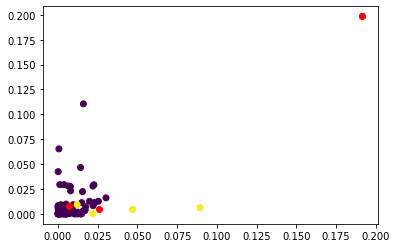

In [ ]:
# 'Clustering' principaux facteurs
kmeans = KMeans(n_clusters=3)
kmeans.fit(ctr)
plt.scatter(ctr[:,0], ctr[:,1], c=kmeans.predict(ctr))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

In [ ]:
# 'Clustering' des bedrooms et bathrooms 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_entrer)
plt.scatter(X_entrer[:,0], X_entrer[:,1], c=kmeans.predict(X_entrer))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

[0 0 0 ... 0 0 0]


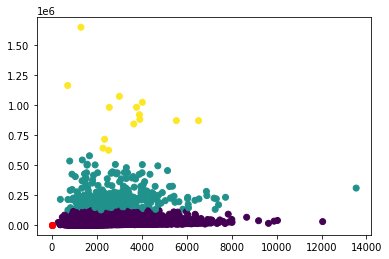

In [ ]:
# 'Clustering' de la surface habitable et surface de terrain 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_entrer)
plt.scatter(X_entrer[:,2], X_entrer[:,3], c=kmeans.predict(X_entrer))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')

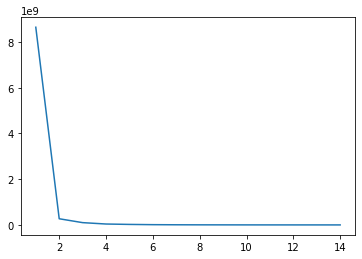

In [ ]:
# Calcul de coûts (elbow methods)
intertia = []
k_range = range(1,15)
for r in k_range:
  model = KMeans(n_clusters=r).fit(X_entrer)
  intertia.append(model.inertia_)

plt.plot(k_range, intertia)